## 1.Importing libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.exceptions import NotFittedError
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [2]:
# 1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

In [3]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Get some primary informations about our data

In [5]:
titanic_df.shape

(891, 12)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### we can notice that :
 *  In this data, PassengerId, Name, Ticket and Cabin seems useless at first sight

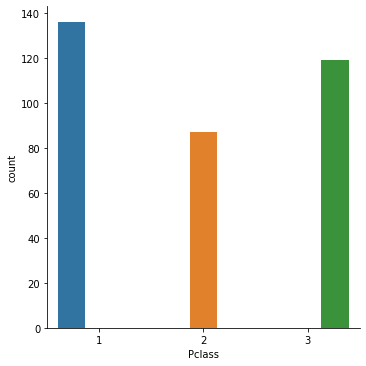

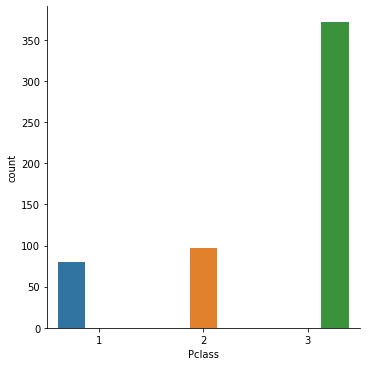

In [8]:
survived = titanic_df[titanic_df['Survived'] == 1]
died = titanic_df[titanic_df['Survived'] == 0]
sns.catplot(x = 'Pclass', hue = 'Pclass',data = survived, kind = 'count')
sns.catplot(x = 'Pclass', hue = 'Pclass',data = died , kind = 'count')

#### we can notice that :
 *  survival counts are almost equal for all the classes
 *  number of died persons  increase as the class number increases 
 *  first class passengers have better survival rate
 *  so Pclass is a really important feature

Text(0.5, 1.0, 'Survived')

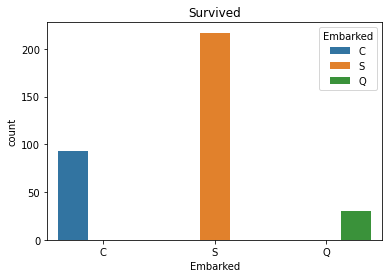

In [9]:
sns.countplot(x="Embarked",  hue="Embarked", data = survived, order=['C','S','Q']).set_title('Survived')

Text(0.5, 1.0, 'Died')

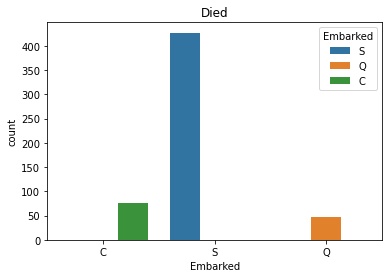

In [10]:
sns.countplot(x="Embarked",  hue="Embarked", data = died, order=['C','S','Q']).set_title('Died')

#### we can notice that :
 * Embarked can be an important feature for our training

Text(0.5, 1.0, 'Survived')

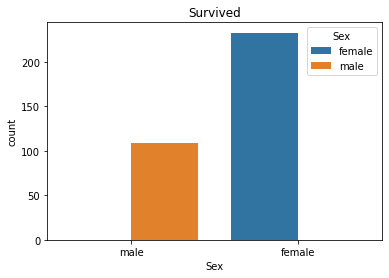

In [11]:
sns.countplot(x="Sex",  hue="Sex", data = survived, order=['male','female']).set_title('Survived')

Text(0.5, 1.0, 'Died')

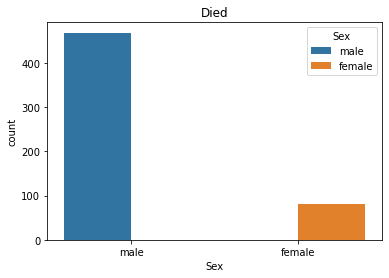

In [12]:
sns.countplot(x="Sex",  hue="Sex", data = died, order=['male','female']).set_title('Died')

#### we can notice that :
* females had more chance to survied more then males
* sex is an important feature

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

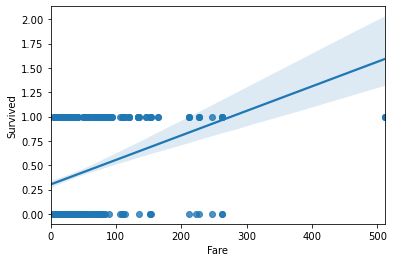

In [13]:
sns.regplot( x="Fare",y = "Survived", data=titanic_df)

#### we can notice that:
* rend goes higher as the fare rises
*  there are more survived point then deceased point on high fare end. 
* we have to take Fare into consideration for our training feautures

<AxesSubplot:xlabel='Age', ylabel='Survived'>

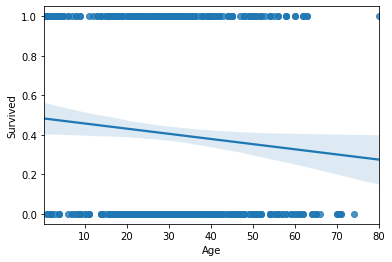

In [14]:
sns.regplot( x="Age",y="Survived", data=titanic_df)

#### we can notice that: 

   * 0-20 age group  had very high rate of survival.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

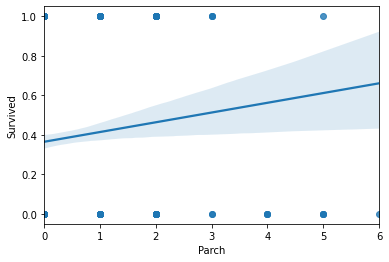

In [15]:
sns.regplot( x="Parch",y="Survived", data=titanic_df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

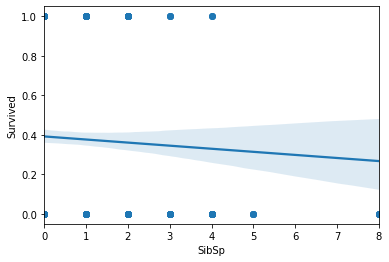

In [16]:
sns.regplot( x="SibSp",y="Survived", data=titanic_df)

## 3. Preparing data

In [17]:
# from the graphs above i have dropped the useless columns.
cleaned_df = titanic_df.drop(['PassengerId', 'Parch', 'SibSp', 'Name', 'Ticket', 'Cabin'], axis = 1) # drop unrelated columns

In [18]:
#  I have filled null values on Age  with the mean.
cleaned_df['Age'] = cleaned_df['Age'].fillna(titanic_df['Age'].mean()) # fill nulls in Age column with mean age

In [19]:
cleaned_df = cleaned_df.dropna() # drop rows with empty embarked

In [20]:
# I encoded categorical data columns to numerical data because decision tree method can not manipulate categorical features.

LE = preprocessing.LabelEncoder()

# transforming Embarked column
LE.fit(cleaned_df["Embarked"])
Embarked = LE.transform(cleaned_df['Embarked'])

# transforming Sex column
LE.fit(cleaned_df["Sex"])
Sex = LE.transform(cleaned_df['Sex'])

# droping Embarked and Sex columns and filling them with the transform correspending data

cleaned_df = cleaned_df.drop(['Embarked', 'Sex'], axis = 1)
cleaned_df['Embarked'] = Embarked
cleaned_df['Sex'] = Sex

In [21]:
cleaned_df.head()

,Survived,Pclass,Age,Fare,Embarked,Sex
0,0,3,22.0,7.2500,2,1
1,1,1,38.0,71.2833,0,0
2,1,3,26.0,7.9250,2,0
3,1,1,35.0,53.1000,2,0
4,0,3,35.0,8.0500,2,1


In [22]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   Fare      889 non-null    float64
 4   Embarked  889 non-null    int32  
 5   Sex       889 non-null    int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 41.7 KB


In [23]:
# now our data is ready for the machine learning part

## 4. Spliting  data

In [24]:
X = cleaned_df.drop('Survived', axis=1)
y = cleaned_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## 5. Train Models

In [25]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## 6.Testing our model

In [26]:
#compute the prediction for training and testing periods
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [27]:
#performance for training period
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       367
           1       1.00      0.96      0.98       228

    accuracy                           0.98       595
   macro avg       0.99      0.98      0.98       595
weighted avg       0.98      0.98      0.98       595



In [28]:
#perfromance for testing period
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       182
           1       0.72      0.68      0.70       112

    accuracy                           0.78       294
   macro avg       0.77      0.76      0.76       294
weighted avg       0.78      0.78      0.78       294



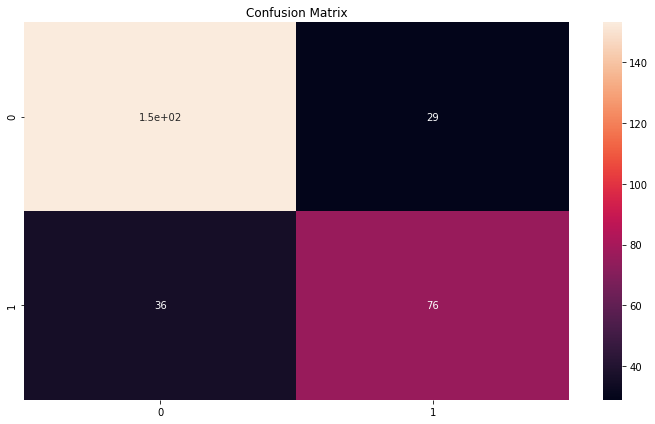

In [29]:
plt.figure(figsize=(10,6))
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [30]:
# 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

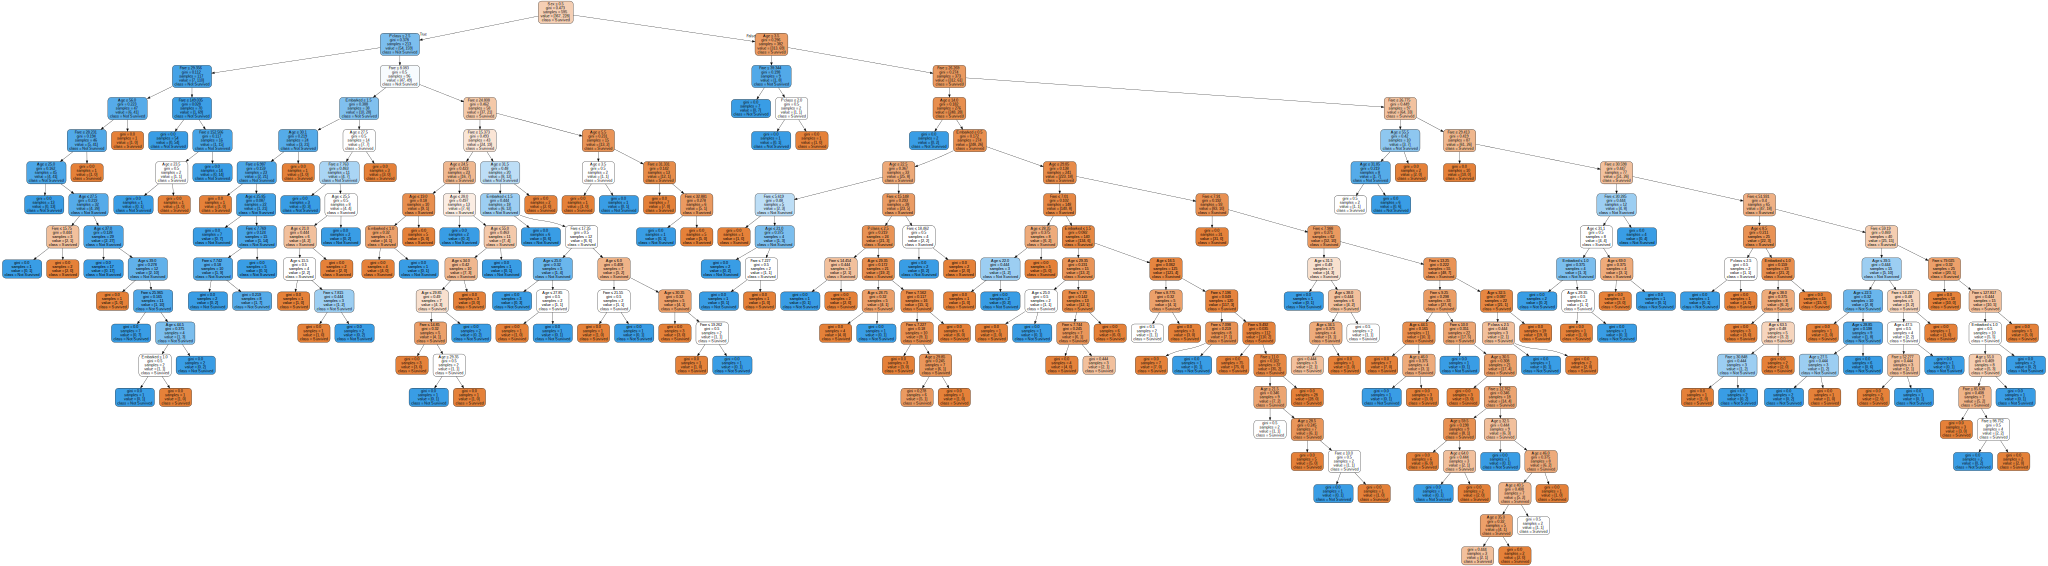

In [31]:
import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("Titanic") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,  
                         class_names=['Survived','Not Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [32]:
# 3. Change the decision tree parameters(change at least two parameters)

##  Spliting data

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## Train Models

In [34]:
# Train Models
clf_modified = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
clf_modified.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
# 4. Calculate the new accuracy and compare it with the previous results. 

## Testing our model

In [36]:

#compute the prediction for training and testing periods
y_pred_train_mod = clf_modified.predict(X_train)
y_pred_test_mod = clf_modified.predict(X_test)

In [37]:
#performance for training period
print(classification_report(y_train, y_pred_train_mod))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       367
           1       0.90      0.69      0.78       228

    accuracy                           0.85       595
   macro avg       0.87      0.82      0.84       595
weighted avg       0.86      0.85      0.85       595



In [38]:
#perfromance for testing period
print(classification_report(y_test, y_pred_test_mod))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       182
           1       0.87      0.63      0.73       112

    accuracy                           0.82       294
   macro avg       0.84      0.79      0.80       294
weighted avg       0.83      0.82      0.82       294



### comparaison:
* After changing the 2 parameters "criterion" which is equal to "gini" for the first tree and it changed to 'entropy' and    max_depth which is "None" for the first one and it  changed to 5 in the second one
* for the training part: the value of accuracy  change (0.98 to 0.85)(decrease)
* for the testing part: the value of accuracy  change  (0.78 to 0.82 )(increase)

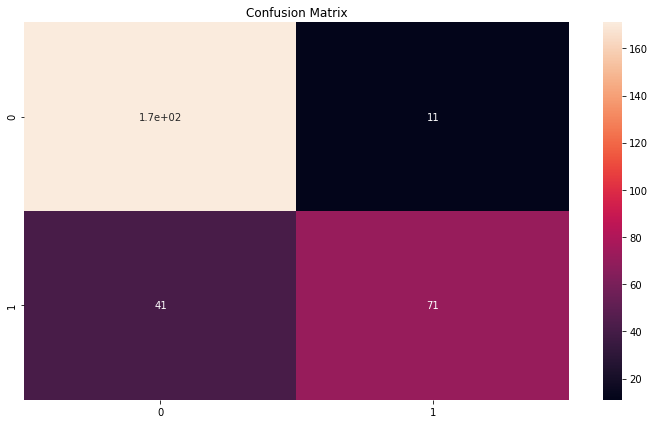

In [39]:
plt.figure(figsize=(10,6))
conf_matrix = confusion_matrix(y_test, y_pred_test_mod)
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [40]:
# 5. Use random forest then change the number of estimators

## Spliting data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train Models

In [42]:
clf_for = RandomForestClassifier(n_estimators=100)
clf_for.fit(X_train, y_train)

RandomForestClassifier()

## Testing our model

In [43]:
#compute the prediction for training and testing periods
y_pred_train_for = clf_for.predict(X_train)
y_pred_test_for = clf_for.predict(X_test)

In [44]:
#performance for training period
print(classification_report(y_train, y_pred_train_for))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       437
           1       0.99      0.97      0.98       274

    accuracy                           0.98       711
   macro avg       0.98      0.98      0.98       711
weighted avg       0.98      0.98      0.98       711



In [45]:
#perfromance for testing period
print(classification_report(y_test, y_pred_test_for))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       112
           1       0.73      0.70      0.71        66

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



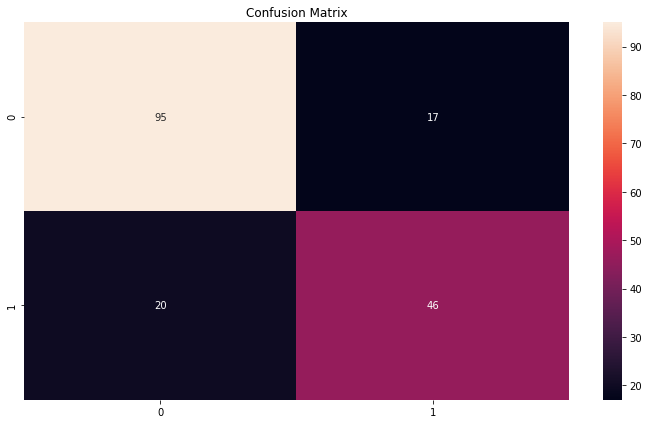

In [46]:
plt.figure(figsize=(10,6))
conf_matrix = confusion_matrix(y_test, y_pred_test_for)
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [47]:
# 6. Calculate the new accuracy and compare it with the previous result.

## Train Models

In [48]:
clf_for_mod = RandomForestClassifier(n_estimators=200)
clf_for_mod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

## Testing our model

In [49]:
#compute the prediction for training and testing periods
y_pred_train_for_mod = clf_for_mod.predict(X_train)
y_pred_test_for_mod = clf_for_mod.predict(X_test)

In [50]:
#performance for training period
print(classification_report(y_train, y_pred_train_for_mod))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       437
           1       0.99      0.97      0.98       274

    accuracy                           0.98       711
   macro avg       0.98      0.98      0.98       711
weighted avg       0.98      0.98      0.98       711



In [51]:
#perfromance for testing period
print(classification_report(y_test, y_pred_test_for_mod))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       112
           1       0.70      0.68      0.69        66

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178



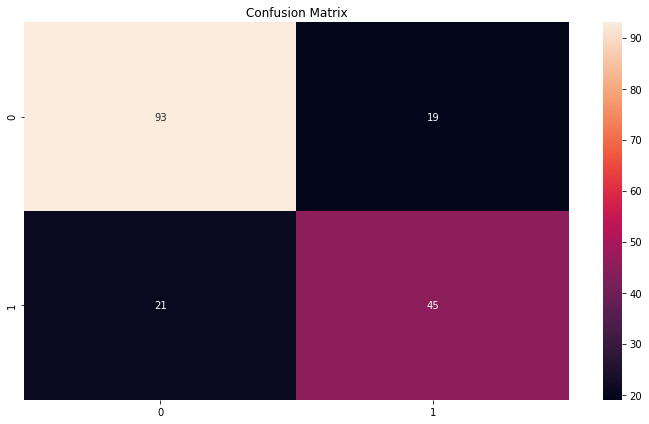

In [52]:
plt.figure(figsize=(10,6))
conf_matrix = confusion_matrix(y_test, y_pred_test_for_mod)
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

### comparaison :
* if we increase the number of estimators the value of accuracy doesn't change